In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r"C:\Users\Nitro\Desktop\Exam_Score_Prediction.csv")
print(df.head())

   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        moderate        54.8  
2       

In [34]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [36]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

# Capitalizing the first letter of each column name for systematic format

In [37]:
df.columns = df.columns.str.capitalize()
print(df.columns)

Index(['Student_id', 'Age', 'Gender', 'Course', 'Study_hours',
       'Class_attendance', 'Internet_access', 'Sleep_hours', 'Sleep_quality',
       'Study_method', 'Facility_rating', 'Exam_difficulty', 'Exam_score'],
      dtype='object')


In [38]:
print(df.head())

   Student_id  Age  Gender   Course  Study_hours  Class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  Internet_access  Sleep_hours Sleep_quality   Study_method Facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  Exam_difficulty  Exam_score  
0            hard        58.9  
1        moderate        54.8  
2       

# Gender Distribution

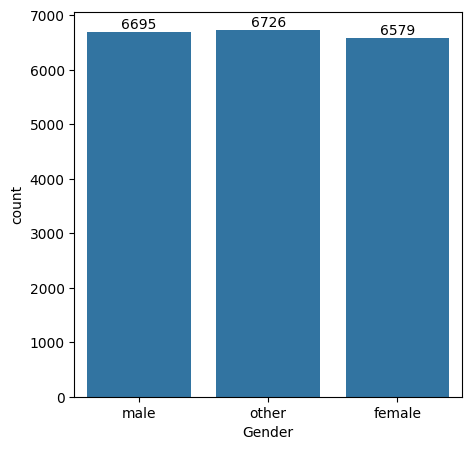

In [39]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = 'Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [40]:
# From the above char, we can analyse that:
## The number of other gender is more than that of males and females.

# Distribution of Student Gender (Binary)

In [41]:
# Create a new dataframe without 'other'
df_filtered = df[df['Gender'] != 'other']

# Verify the change
print(df_filtered['Gender'].value_counts())

Gender
male      6695
female    6579
Name: count, dtype: int64


In [42]:
# Overwrite the existing 'df' variable with only male and female rows
df = df[df['Gender'] != 'other']

# Optional: Reset the index so it starts from 0 again
df = df.reset_index(drop=True)

# Verify the change
print(df['Gender'].value_counts())

Gender
male      6695
female    6579
Name: count, dtype: int64


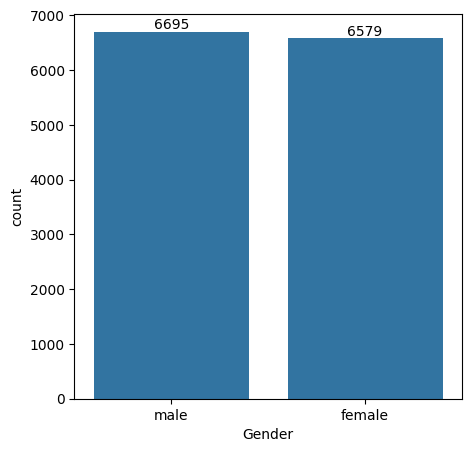

In [43]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = 'Gender')
ax.bar_label(ax.containers[0])
plt.show()

### From the above chart, we can analyse that:
#### The number of males in the data is more than that of female

# Comparing exam score with respect to study hours

In [44]:
gb = df.groupby("Study_hours").agg({"Exam_score": 'mean'})
print(gb)

             Exam_score
Study_hours            
0.08          39.121170
0.09          40.199944
0.10          48.669231
0.11          42.890909
0.12          38.047059
...                 ...
7.87          80.972222
7.88          83.190909
7.89          84.653333
7.90          86.823529
7.91          86.410323

[784 rows x 1 columns]


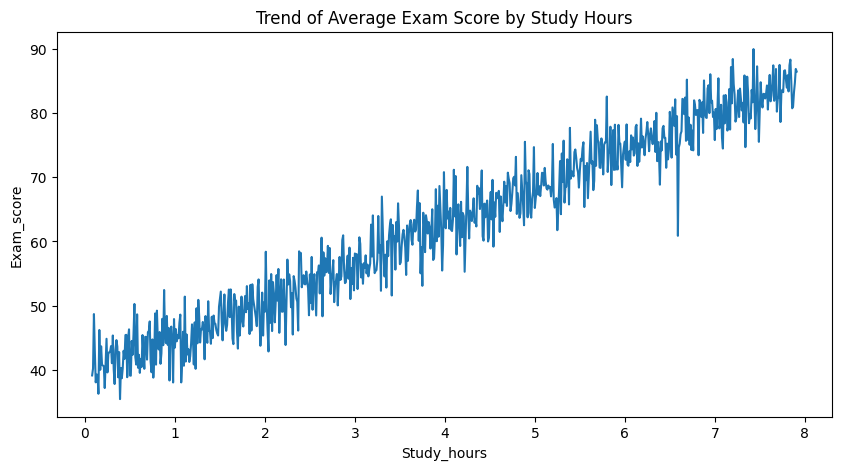

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gb, x=gb.index, y='Exam_score')
plt.title("Trend of Average Exam Score by Study Hours")
plt.show()

### From the above line plot, we can conclude that:
#### Those students who study for longer hours like 7-8 hours score higher marks

# Comparing exam scores with respect to sleep hours

In [46]:
gb = df.groupby("Study_hours").agg({"Sleep_hours": 'mean'})
print(gb)

             Sleep_hours
Study_hours             
0.08            6.775177
0.09            6.927778
0.10            7.915385
0.11            7.227273
0.12            6.164706
...                  ...
7.87            6.188889
7.88            7.645455
7.89            6.586667
7.90            6.758824
7.91            7.183226

[784 rows x 1 columns]


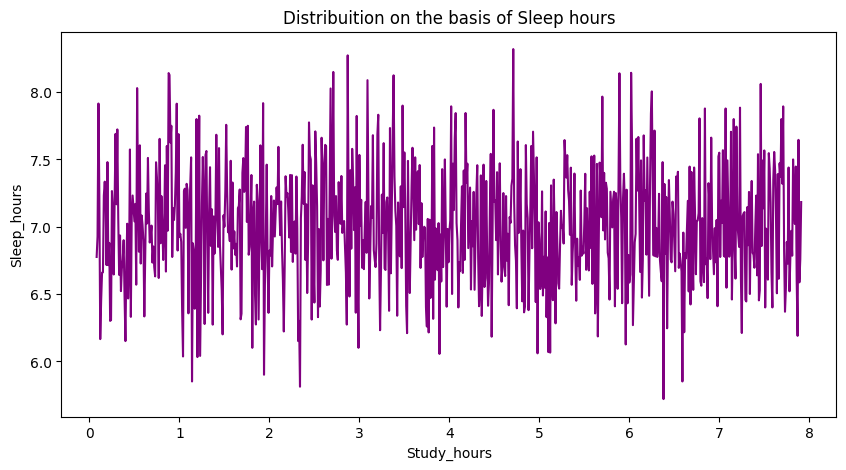

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=gb, x=gb.index, y='Sleep_hours', color='purple')
plt.title("Distribuition on the basis of Sleep hours")
plt.show()

# Bloxplot for exam score

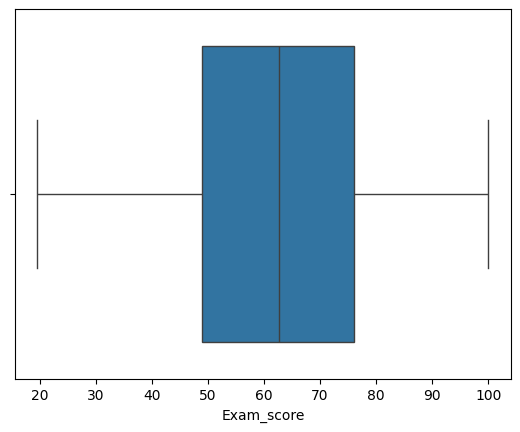

In [48]:
sns.boxplot( data = df ,x = "Exam_score" )
plt.show()

# Distribution of exam score on the basis of Exam Difficulty

In [49]:
print(df["Exam_difficulty"].unique())

['hard' 'moderate' 'easy']


In [50]:
hard = df.loc[(df['Exam_difficulty'] == 'hard')].count()
print(hard)

Student_id          2599
Age                 2599
Gender              2599
Course              2599
Study_hours         2599
Class_attendance    2599
Internet_access     2599
Sleep_hours         2599
Sleep_quality       2599
Study_method        2599
Facility_rating     2599
Exam_difficulty     2599
Exam_score          2599
dtype: int64


In [51]:
moderate = df.loc[(df['Exam_difficulty'] == 'moderate')].count()
print(moderate)

Student_id          6577
Age                 6577
Gender              6577
Course              6577
Study_hours         6577
Class_attendance    6577
Internet_access     6577
Sleep_hours         6577
Sleep_quality       6577
Study_method        6577
Facility_rating     6577
Exam_difficulty     6577
Exam_score          6577
dtype: int64


In [52]:
easy = df.loc[(df['Exam_difficulty'] == 'easy')].count()
print(easy)

Student_id          4098
Age                 4098
Gender              4098
Course              4098
Study_hours         4098
Class_attendance    4098
Internet_access     4098
Sleep_hours         4098
Sleep_quality       4098
Study_method        4098
Facility_rating     4098
Exam_difficulty     4098
Exam_score          4098
dtype: int64


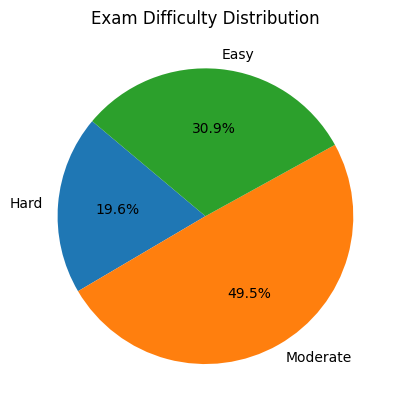

In [53]:
easy = df.loc[(df['Exam_difficulty'] == 'easy')].count()
moderate = df.loc[(df['Exam_difficulty'] == 'moderate')].count()
hard = df.loc[(df['Exam_difficulty'] == 'hard')].count()

l = ["Hard", "Moderate", "Easy"]
mlist = [hard["Exam_difficulty"], moderate["Exam_difficulty"], easy["Exam_difficulty"]]

# The Plot
plt.pie(mlist, labels=l)
plt.title("Exam Difficulty Distribution")
plt.show()

# Distribuition of exam score on the basis of courses

In [55]:
print(df["Course"].unique())

['diploma' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com' 'bca']


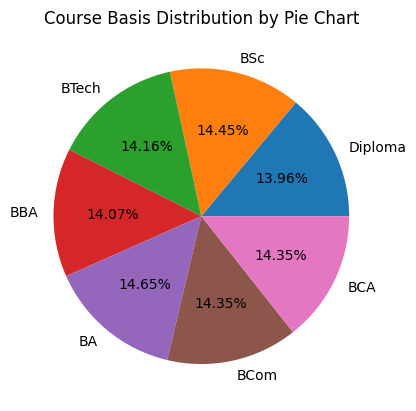

In [60]:
diploma = df.loc[(df['Course'] == 'diploma')].count()
bsc = df.loc[(df['Course'] == 'b.sc')].count()
btech = df.loc[(df['Course'] == 'b.tech')].count()
bba = df.loc[(df['Course'] == 'bba')].count()
ba = df.loc[(df['Course'] == 'ba')].count()
bcom = df.loc[(df['Course'] == 'b.com')].count()
bca = df.loc[(df['Course'] == 'bca')].count()

l = ["Diploma", "BSc", "BTech", "BBA", "BA", "BCom", "BCA"]
mlist = [diploma["Course"], bsc["Course"], btech["Course"], bba["Course"], ba["Course"], bca["Course"], bca["Course"]]

# The Plot
plt.pie(mlist, labels=l , autopct = "%1.2f%%")
plt.title("Course Basis Distribution by Pie Chart")
plt.show()

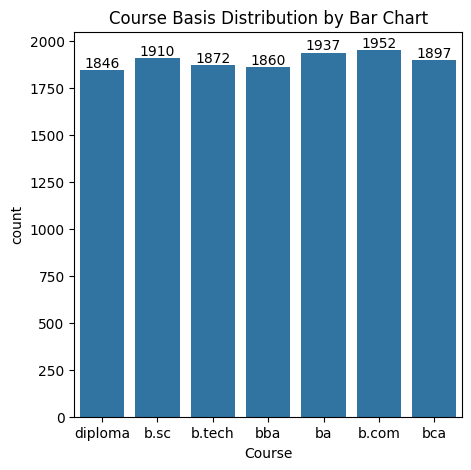

In [61]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = 'Course')
ax.bar_label(ax.containers[0])
plt.title("Course Basis Distribution by Bar Chart")
plt.show()